# Analysis

## import ライブラリー

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Data定義

In [2]:
%%time
df_subjects_info = pd.read_csv('../02_data_analysis/subjects_info/subjects_info.csv')
#df_aal = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_aal.csv')
#df_ho = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_ho.csv')

#df_dynamic_aal = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_aal.csv')
#df_dynamic_ho = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_ho.csv')

CPU times: user 24.9 ms, sys: 4.49 ms, total: 29.4 ms
Wall time: 52.6 ms


In [5]:
def make_info_data(df = df_subjects_info,col = ['Age','Sex','やる気スコア(Apathy scale)']):
    subID = np.array(df.subID)
    subjects_info_list = []
    for ID in subID:
        data = np.array(df[df.subID == ID][col])[0]
        if 'Sex' in col:
            idx_sex = col.index('Sex')
            if data[idx_sex] == '男':
                data[idx_sex] = 0
            else:
                data[idx_sex] = 1
        
        subjects_info_list.append(data)
    subjects_info = np.array(subjects_info_list)
    
    if 'Age' in col:
        idx_age = col.index('Age')
    for i in range(len(col)):
        if i == idx_age:
            subjects_info[:,i] = (subjects_info[:,i] - \
                                  np.mean(subjects_info[:,i]))/np.std(subjects_info[:,i])
    return subjects_info.astype(np.float)

def make_data(df, subID = df_subjects_info.subID ,remove_list = ['time','subID']):
    data_list = []
    df_cols = list(df.columns)
    for r in remove_list:
        try:
            df_cols.remove(r)
        except:
            pass
    for ID in df_subjects_info.subID:
        data = df[df.subID == ID][df_cols]
        data = np.array(data)
        data_list.append(data)
    data = np.array(data_list)
    return data

In [6]:
%%time
data_label = make_info_data()
age_mean = df_subjects_info.Age.mean()
age_std = df_subjects_info.Age.std()

#data_aal = make_data(df_aal)
#data_ho = make_data(df_ho)
#data_dynamic_aal = make_data(df_dynamic_aal)
#data_dynamic_ho  = make_data(df_dynamic_ho)

CPU times: user 1.05 s, sys: 3.75 ms, total: 1.06 s
Wall time: 1.05 s


### AAL

In [7]:
aal_1 = np.load('../02_data_analysis/temp/all_aal_1.npz')
aal_2 = np.load('../02_data_analysis/temp/all_aal_2.npz')
aal_dynamic_1 = np.load('../02_data_analysis/temp/all_dynamic_aal_1.npz')
aal_dynamic_2 = np.load('../02_data_analysis/temp/all_dynamic_aal_2.npz')

test_pred_aal_1 = aal_1['arr_0']
test_pred_aal_inverse_1 = aal_1['arr_1']
test_label_aal_1 = aal_1['arr_2']
test_idx_aal_1 = aal_1['arr_3']
train_idx_aal_1 = aal_1['arr_4']

test_pred_aal_2 = aal_2['arr_0']
test_pred_aal_inverse_2 = aal_2['arr_1']
test_label_aal_2 = aal_2['arr_2']
test_idx_aal_2 = aal_2['arr_3']
train_idx_aal_2 = aal_2['arr_4']

test_pred_aal_dynamic_1 = aal_dynamic_1['arr_0']
test_pred_aal_dynamic_inverse_1 = aal_dynamic_1['arr_1']
test_label_aal_dynamic_1 = aal_dynamic_1['arr_2']
test_idx_aal_dynamic_1 = aal_dynamic_1['arr_3']
train_idx_aal_dynamic_1 = aal_dynamic_1['arr_4']

test_pred_aal_dynamic_2 = aal_dynamic_2['arr_0']
test_pred_aal_dynamic_inverse_2 = aal_dynamic_2['arr_1']
test_label_aal_dynamic_2 = aal_dynamic_2['arr_2']
test_idx_aal_dynamic_2 = aal_dynamic_2['arr_3']
train_idx_aal_dynamic_2 = aal_dynamic_2['arr_4']

### Harvard-Oxford

In [8]:
ho_1 = np.load('../02_data_analysis/temp/all_ho_1.npz')
ho_2 = np.load('../02_data_analysis/temp/all_ho_2.npz')
ho_dynamic_1 = np.load('../02_data_analysis/temp/all_dynamic_ho_1.npz')
ho_dynamic_2 = np.load('../02_data_analysis/temp/all_dynamic_ho_2.npz')

test_pred_ho_1 = ho_1['arr_0']
test_pred_ho_inverse_1 = ho_1['arr_1']
test_label_ho_1 = ho_1['arr_2']
test_idx_ho_1 = ho_1['arr_3']
train_idx_ho_1 = ho_1['arr_4']

test_pred_ho_2 = ho_2['arr_0']
test_pred_ho_inverse_2 = ho_2['arr_1']
test_label_ho_2 = ho_2['arr_2']
test_idx_ho_2 = ho_2['arr_3']
train_idx_ho_2 = ho_2['arr_4']

test_pred_ho_dynamic_1 = ho_dynamic_1['arr_0']
test_pred_ho_dynamic_inverse_1 = ho_dynamic_1['arr_1']
test_label_ho_dynamic_1 = ho_dynamic_1['arr_2']
test_idx_ho_dynamic_1 = ho_dynamic_1['arr_3']
train_idx_ho_dynamic_1 = ho_dynamic_1['arr_4']

test_pred_ho_dynamic_2 = ho_dynamic_2['arr_0']
test_pred_ho_dynamic_inverse_2 = ho_dynamic_2['arr_1']
test_label_ho_dynamic_2 = ho_dynamic_2['arr_2']
test_idx_ho_dynamic_2 = ho_dynamic_2['arr_3']
train_idx_ho_dynamic_2 = ho_dynamic_2['arr_4']

## 予測結果

In [9]:
n_splits = len(test_idx_aal_1)

In [31]:
def test_plot(preds,labels,title=''):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)])
    
    new_line = '\n'
    corr,p = pearsonr(label[:,0],pred[:,0])
    mae = mean_absolute_error_pred(preds,labels)
            
    lr = LinearRegression()
    lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)

    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(label[:,0]*age_std+age_mean,pred[:,0]*age_std+age_mean,
               label = f'corrcoef : {corr:.3f}{new_line}p value : {p}{new_line}MAE : {mae}')#散布図をプロット
    plt.plot(label[:,0]*age_std+age_mean,
             lr.predict(label*age_std+age_mean), color = 'red',
            label = f'y = {lr.coef_[0]:.3f}x + {lr.intercept_:.3f}')#回帰直線をプロット

    plt.title(title, fontsize=14)   # 図のタイトル
    plt.xlabel('chronological age', fontsize=14)# x軸のラベル
    plt.ylabel('predicted age', fontsize=14)    # y軸のラベル
    plt.legend(fontsize=10.5)
    plt.grid()     # グリッド線を表示
    plt.show()     # 図の表示

    print('相関係数: ', np.corrcoef(label[:,0],pred[:,0])[0,1])
    print('r^2 val data: ', r2_score(label[:,0],pred[:,0]))
    print('切片: ', lr.intercept_)
    print('傾き: ', lr.coef_[0])

In [32]:
def mean_absolute_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)])
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_absolute_error(pred,label)

def mean_squared_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_squared_error(pred,label)

In [33]:
mean_absolute_error_pred(test_pred_aal_1,test_label_aal_1)
mean_absolute_error_pred(test_pred_aal_2,test_label_aal_2)
mean_absolute_error_pred(test_pred_aal_dynamic_1,test_label_aal_dynamic_1)
mean_absolute_error_pred(test_pred_aal_dynamic_2,test_label_aal_dynamic_2)

8.155909867777273

8.306455223227438

8.372469960886997

8.51787102943216

In [19]:
mean_absolute_error_pred(test_pred_ho_1,test_label_ho_1)
mean_absolute_error_pred(test_pred_ho_2,test_label_ho_2)
mean_absolute_error_pred(test_pred_ho_dynamic_1,test_label_ho_dynamic_1)
mean_absolute_error_pred(test_pred_ho_dynamic_2,test_label_ho_dynamic_2)

8.444076315176734

8.545359155277312

8.266094051047912

8.280475554754128

### AAL

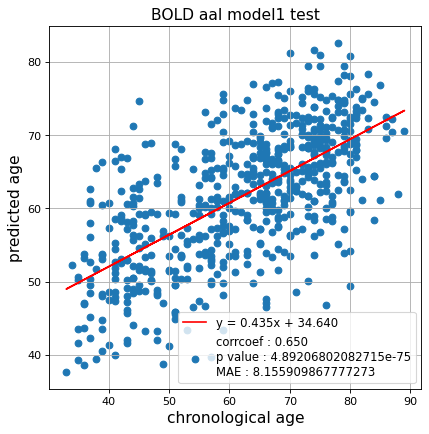

相関係数:  0.6497346435482114
r^2 val data:  0.4197421668059338
切片:  34.639925719155436
傾き:  0.4351084632841519


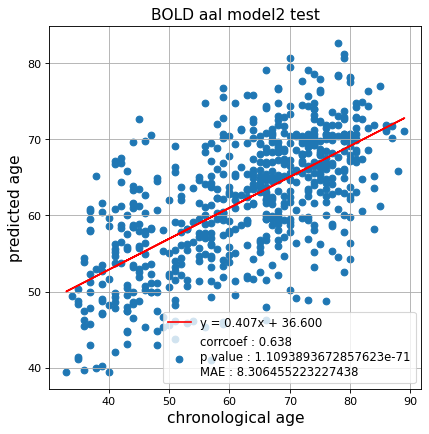

相関係数:  0.6383080272098144
r^2 val data:  0.40646170242674984
切片:  36.60039201660388
傾き:  0.40664152553614585


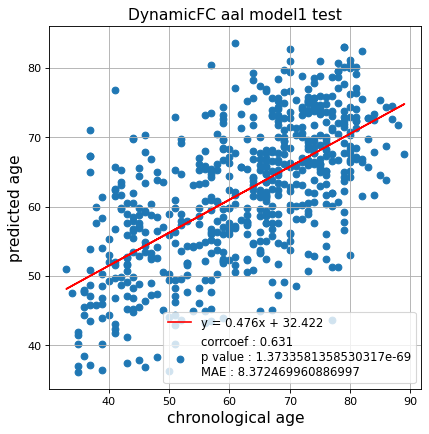

相関係数:  0.6309280791565818
r^2 val data:  0.38233654344592816
切片:  32.421999222734
傾き:  0.47633651584569514


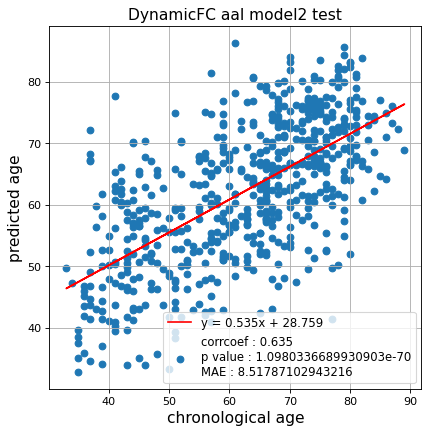

相関係数:  0.634822306365268
r^2 val data:  0.35941498900938396
切片:  28.759412907244894
傾き:  0.5349914668935923


In [39]:
test_plot(test_pred_aal_1,test_label_aal_1,'BOLD aal model1')
test_plot(test_pred_aal_2,test_label_aal_2,'BOLD aal model2')
test_plot(test_pred_aal_dynamic_1,test_label_aal_dynamic_1,'DynamicFC aal model1')
test_plot(test_pred_aal_dynamic_2,test_label_aal_dynamic_2,'DynamicFC aal model2')

### Harvard-Oxford

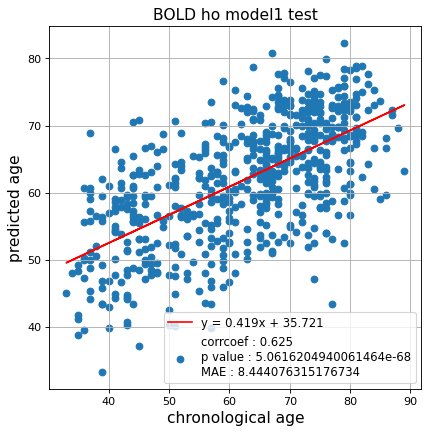

相関係数:  0.62526986437184
r^2 val data:  0.3874835530512102
切片:  35.72147377739765
傾き:  0.41932825672026


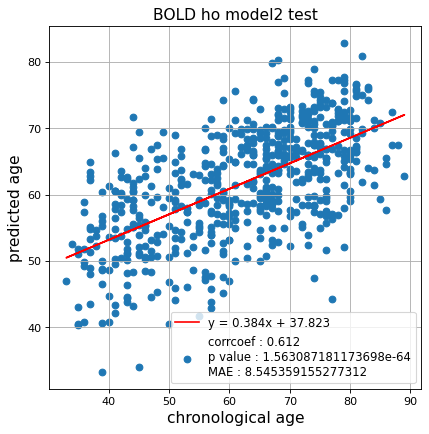

相関係数:  0.6122312784040167
r^2 val data:  0.37271755877306
切片:  37.82337409617831
傾き:  0.38446149874245084


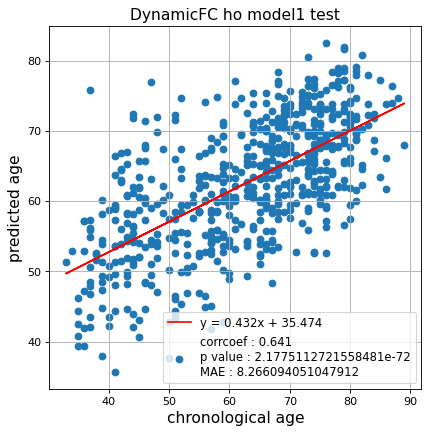

相関係数:  0.6407568510838565
r^2 val data:  0.40946170041847996
切片:  35.47433660586702
傾き:  0.43185638742752663


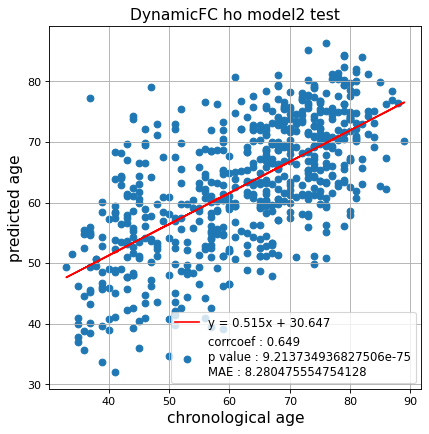

相関係数:  0.6488165976730356
r^2 val data:  0.3988286411939794
切片:  30.647283627446235
傾き:  0.5154168299462553


In [42]:
test_plot(test_pred_ho_1,test_label_ho_1,'BOLD ho model1')
test_plot(test_pred_ho_2,test_label_ho_2,'BOLD ho model2')
test_plot(test_pred_ho_dynamic_1,test_label_ho_dynamic_1,'DynamicFC ho model1')
test_plot(test_pred_ho_dynamic_2,test_label_ho_dynamic_2,'DynamicFC ho model2')

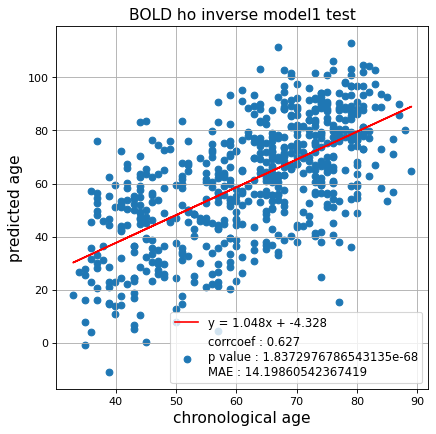

相関係数:  0.6268713854695311
r^2 val data:  -0.7091836141660255
切片:  -4.328223620254917
傾き:  1.0482014115183846


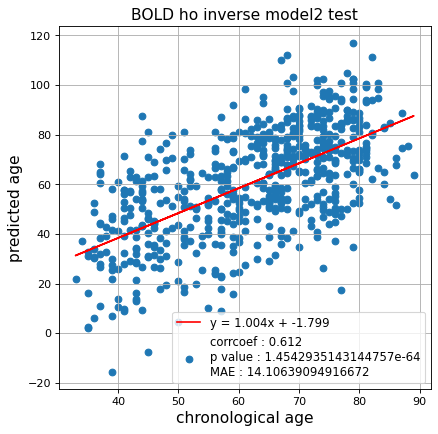

相関係数:  0.6123511049000272
r^2 val data:  -0.693867584376862
切片:  -1.7987961499665204
傾き:  1.0041783147867063


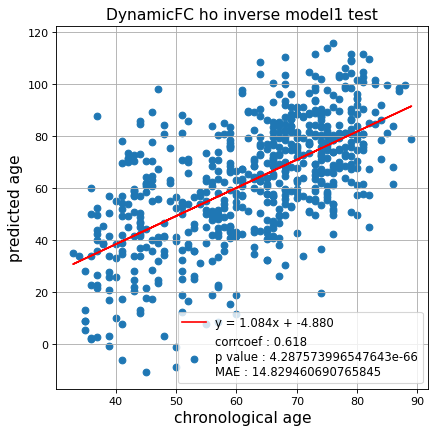

相関係数:  0.6181424713581672
r^2 val data:  -0.9084812586230704
切片:  -4.879987596571517
傾き:  1.084128981626247


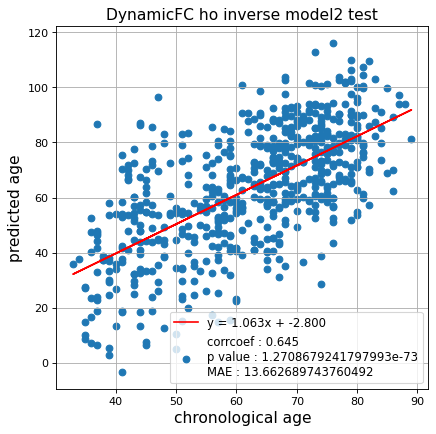

相関係数:  0.6449770142841863
r^2 val data:  -0.5979788903671195
切片:  -2.799592370340747
傾き:  1.063160641873789


In [43]:
test_plot(test_pred_ho_inverse_1,test_label_ho_1,'BOLD ho inverse model1')
test_plot(test_pred_ho_inverse_2,test_label_ho_2,'BOLD ho inverse model2')
test_plot(test_pred_ho_dynamic_inverse_1,test_label_ho_dynamic_1,'DynamicFC ho inverse model1')
test_plot(test_pred_ho_dynamic_inverse_2,test_label_ho_dynamic_2,'DynamicFC ho inverse model2')

## 他指標との相関

In [50]:
def test_compare(preds,labels,title=''):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)])
    
    new_line = '\n'
    
    lr = LinearRegression()
    lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
    label_pred = lr.predict(label*age_std+age_mean)
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean 
    diff  = pred - label_pred
    
    corr_diff,p_diff = pearsonr(diff,data_label[:,2])
    corr_pred,p_pred = pearsonr(pred,data_label[:,2])
    corr_label,p_label = pearsonr(label_pred,data_label[:,2])
    
    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(diff,data_label[:,2],
               label = f'corrcoef diff: {corr_diff:.3f},p value : {p_diff:.3f}{new_line}\
corrcoef diff: {corr_pred:.3f},p value : {p_pred:.3f}{new_line}\
corrcoef diff: {corr_label:.3f},p value : {p_label:.3f}')#散布図をプロット
    plt.title(title, fontsize=14)   # 図のタイトル
    plt.xlabel('predicted - label predicted', fontsize=14)    # x軸のラベル
    plt.ylabel('apathy score', fontsize=14)  # y軸のラベル
    plt.legend(fontsize=10.5)
    plt.grid()                     # グリッド線を表示
    plt.show()                     # 図の表示
    
    print("相関係数　diff:", corr_diff)
    print("p値:", p_diff)
    print()
    print("相関係数　pred:", corr_pred)
    print("p値:", p_pred)
    print()
    print("相関係数　label:", corr_label)
    print("p値:", p_label)

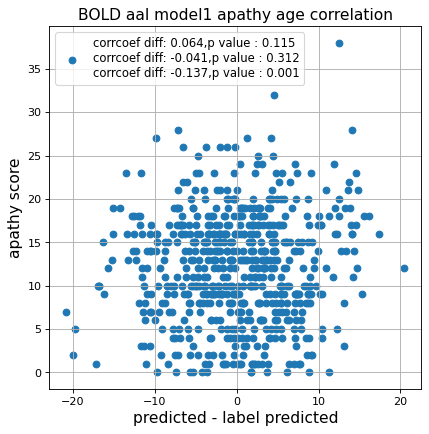

相関係数　diff: 0.0636825535240614
p値: 0.11464265791418843

相関係数　pred: -0.04086364143238611
p値: 0.31165936051006227

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


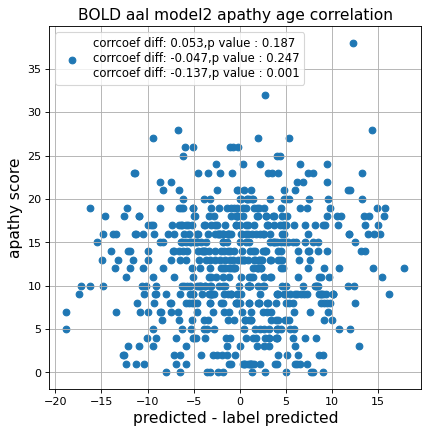

相関係数　diff: 0.05324193839337963
p値: 0.18730075504284655

相関係数　pred: -0.04671800492412615
p値: 0.2473362905325644

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


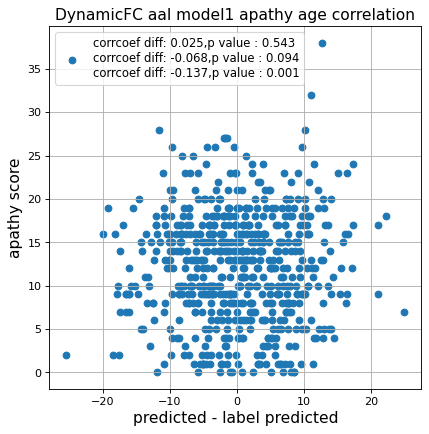

相関係数　diff: 0.024588611962504628
p値: 0.542770229653609

相関係数　pred: -0.06761178212352824
p値: 0.09389032069719036

相関係数　label: -0.13739861517846244
p値: 0.0006339440906363297


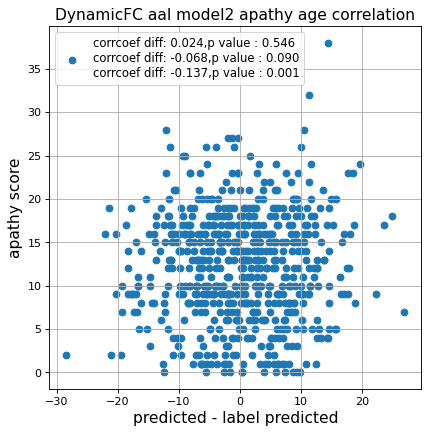

相関係数　diff: 0.024418481570700066
p値: 0.5455665604567396

相関係数　pred: -0.06835656758726036
p値: 0.09031840337228983

相関係数　label: -0.13739861517846247
p値: 0.0006339440906362937


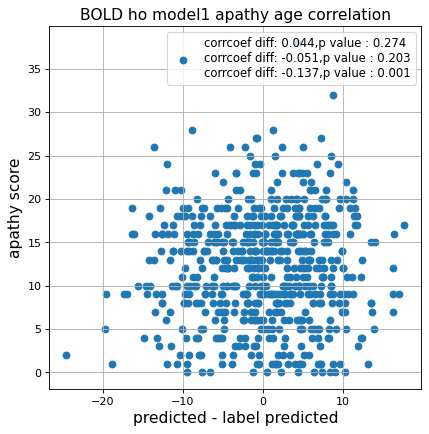

相関係数　diff: 0.044218465080615055
p値: 0.27356617167002084

相関係数　pred: -0.051402741236115566
p値: 0.20301988464838047

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


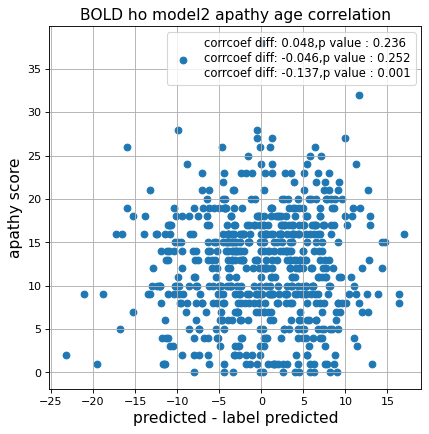

相関係数　diff: 0.047888136661466664
p値: 0.23568093672376386

相関係数　pred: -0.04625559969129226
p値: 0.25205136421426366

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


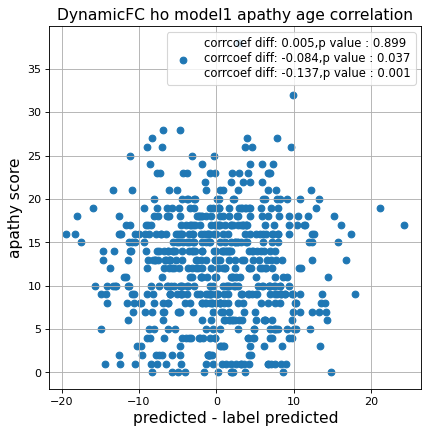

相関係数　diff: 0.005131978227876429
p値: 0.8989318199373626

相関係数　pred: -0.08409905815413289
p値: 0.03706560846628575

相関係数　label: -0.13739861517846247
p値: 0.0006339440906362937


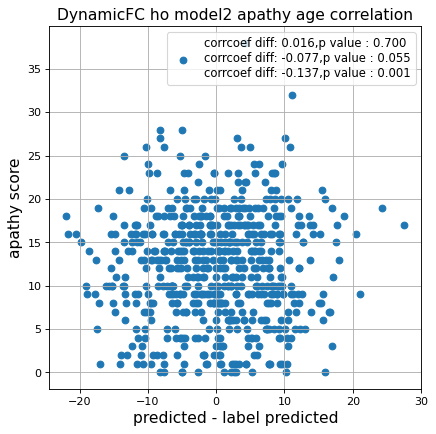

相関係数　diff: 0.0155671371968817
p値: 0.7000222724740951

相関係数　pred: -0.07730077068923275
p値: 0.05536963348395432

相関係数　label: -0.13739861517846252
p値: 0.0006339440906362937


In [55]:
test_compare(test_pred_aal_1,test_label_aal_1,'BOLD aal model1 apathy age correlation')
test_compare(test_pred_aal_2,test_label_aal_2,'BOLD aal model2 apathy age correlation')
test_compare(test_pred_aal_dynamic_1,test_label_aal_dynamic_1,'DynamicFC aal model1 apathy age correlation')
test_compare(test_pred_aal_dynamic_2,test_label_aal_dynamic_2,'DynamicFC aal model2 apathy age correlation')

test_compare(test_pred_ho_1,test_label_ho_1,'BOLD ho model1 apathy age correlation')
test_compare(test_pred_ho_2,test_label_ho_2,'BOLD ho model2 apathy age correlation')
test_compare(test_pred_ho_dynamic_1,test_label_ho_dynamic_1,'DynamicFC ho model1 apathy age correlation')
test_compare(test_pred_ho_dynamic_2,test_label_ho_dynamic_2,'DynamicFC ho model2 apathy age correlation')

## 相補性

In [59]:
def test_complement(preds1,preds2):
    for i in range(n_splits):
        if not i:
            pred1 = preds1[i].mean(axis=0)
        else:
            pred1 = np.concatenate([pred1,preds1[i].mean(axis=0)])
    for i in range(n_splits):
        if not i:
            pred2 = preds2[i].mean(axis=0)
        else:
            pred2 = np.concatenate([pred2,preds2[i].mean(axis=0)])
    
    new_line = '\n'

    corr,p = pearsonr(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    lr = LinearRegression()
    lr.fit(pred1*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    
    plt.figure(figsize=(6, 6), dpi=80)
    plt.scatter(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean,
               label = f'corrcoef: {corr:.3f}{new_line}p value : {p}')
    plt.legend(fontsize=10.5)
    plt.grid()                     # グリッド線を表示
    plt.show()                     # 図の表示

    print("相関係数: ", corr)
    print('r^2 data: ', r2_score(pred1[:,0],pred2[:,0]))
    print('切片: ', lr.intercept_)
    print('傾き: ', lr.coef_[0])

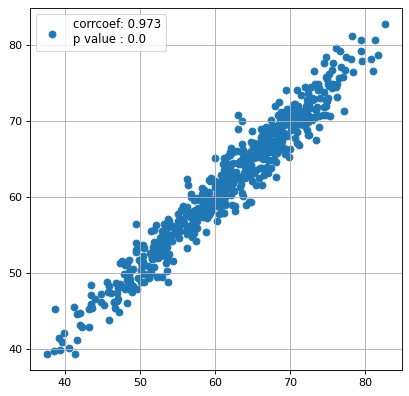

相関係数:  0.9729447614665951
r^2 data:  0.9457355143713495
切片:  4.7833366
傾き:  0.9255675


In [60]:
test_complement(test_pred_aal_1,test_pred_aal_2)

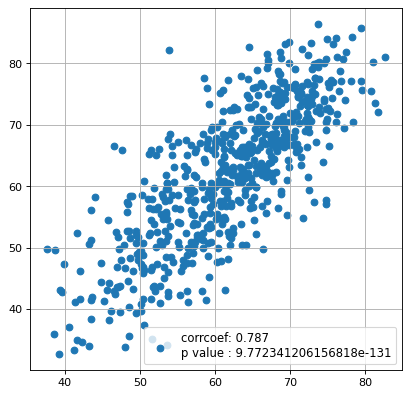

相関係数:  0.7870837389656243
r^2 data:  0.39580489872338365
切片:  0.9384041
傾き:  0.9904992


In [63]:
test_complement(test_pred_aal_1,test_pred_aal_dynamic_2)